In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.stats as sps
import matplotlib.colors as mcolors

from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#from scipy.stats import gaussian_kde

#from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

In [3]:
srad = xr.open_dataset('../../datasets/historical_simple-plumes_yearmean.nc').squeeze()
prp = xr.open_dataset('../../datasets/historical_simple-plumes_yearmean.nc').squeeze()

def WeightedMean(var):
    weights = np.cos(np.deg2rad(var.lat))
    if len(var.shape) >= 2:
        return var.weighted(weights).mean(dim=('lat', 'lon'))
    else:
        return var.weighted(weights).mean("lat")

<xarray.DataArray 'aod_sp1' ()>
array(0.00279439)
Coordinates:
    time     float64 2.005e+07


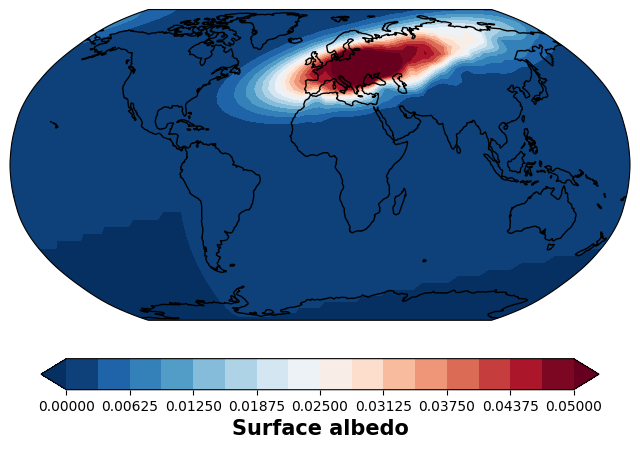

In [7]:
def plot(year):

    time = year - 1850
    albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    albedo = - (srad.sraf0.isel(time=time) - srad.srad0d.isel(time=time))/(srad.srad0d.isel(time=time)) 

    #var = srafs.srafus.isel(time=1932-1850)/srafs.srafds.isel(time=1932-1850) - albedo
    #var = srad.srafs.isel(time=time) - srad.sraf0.isel(time=time)
    var = srad.rsuscs.isel(time=time)/srad.rsdscs.isel(time=time)# - albedo
    var = var.where(var<0.5)

    var = srad.aod_sp1
    var = var.isel(time=time)
    
    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )

    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='RdBu_r',#'magma',
        levels= np.linspace(0, 0.05, 17), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Surface albedo', size=15, weight='bold')

    ax.coastlines()

    print(WeightedMean(var))


plot(2005)

In [86]:
-4/(1/0.1)

-0.4

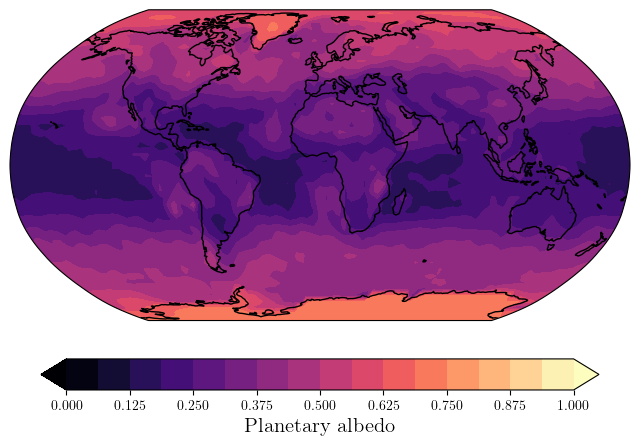

In [43]:
def plot(year):

    time = year - 1850
    #albedo = srad.albedo.isel(time=time)
    albedo = -srad.srad0u.isel(time=time)/(srad.srad0d.isel(time=time))

    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )


    var = albedo
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='magma',
        levels= np.linspace(0, 1, 17), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Planetary albedo', size=15, weight='bold')

    ax.coastlines()


plot(2005)

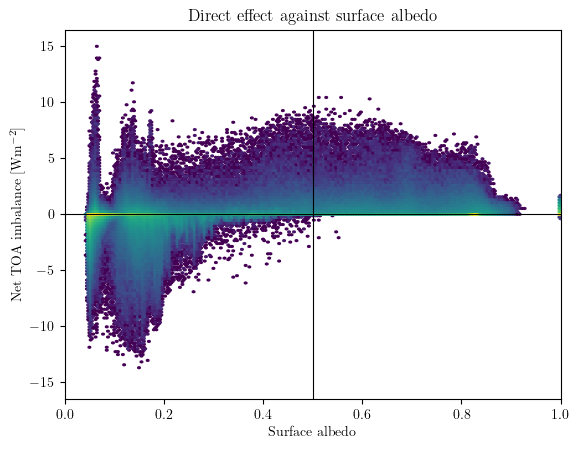

In [8]:
def plot():
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_monmean_1950-2013.nc')
    prp = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_PRP_monmean_1950-2013.nc')

    #time = year - 1850
    #albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    albedo = (- srad.sradsu /(srad.srads - srad.sradsu))
    albedo = albedo.where(albedo>0)
    forcing = (prp.dR_spd_srad0 + prp.dR_spd_trad0)
    
    #forcing = forcing.where((forcing > 0.05) | (forcing < - 0.05))

    #plt.scatter(albedo, forcing, s=1, color='black', marker='x', linewidths=1)
    plt.hexbin(albedo, forcing, gridsize=200, extent=[0,1,-15,15], bins='log', cmap='plasma')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0.5, color='black', linewidth=0.8)
    plt.xlim([0.0,1])

    plt.xlabel('Surface albedo')
    plt.ylabel(r'Net TOA imbalance [Wm$^{-2}$]')

    plt.title('Direct effect against surface albedo')

plot()

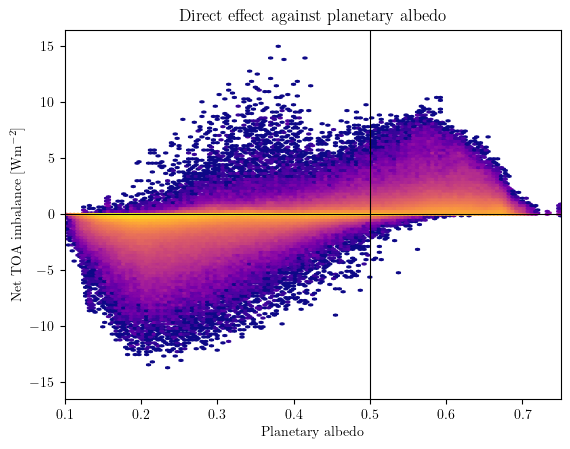

In [4]:
def plot():

    #time = year - 1850
    #albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    albedo = - srad.srad0u/(srad.srad0d)
    albedo = albedo.where((albedo > 0) & (albedo < 1))
    forcing = (prp.dR_spd_srad0 + prp.dR_spd_trad0)
    forcing = forcing.where((forcing > 0.01) | (forcing < - 0.01))

    fig, ax = plt.subplots()
    #ax.hexbin(albedo, forcing, bins=10, extent=[0.05, 0.8, -14, 14])
    
    #plt.scatter(albedo, forcing, s=1, color='black', marker='x', linewidths=1)
    plt.hexbin(albedo, forcing, gridsize=200, extent=[0,1,-15,15], bins='log', cmap='plasma')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0.5, color='black', linewidth=0.8)
    plt.xlim([0.1,0.75])

    plt.xlabel('Planetary albedo')
    plt.ylabel(r'Net TOA imbalance [Wm$^{-2}$]')

    plt.title('Direct effect against planetary albedo')

plot()

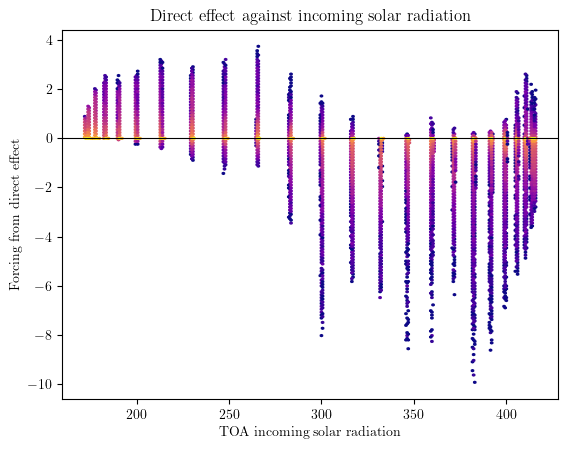

In [6]:
def plot():
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_yearmean.nc')
    prp = xr.open_dataset('../datasets/historical-CR_single-plumes_PRP_yearmean.nc')

    #time = year - 1850
    #albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    irradiance = srad.srad0d
    forcing = (prp.dR_spd_srad0 + prp.dR_spd_trad0)
    #forcing = forcing.where((forcing > 0.05) | (forcing < - 0.05))

    #plt.scatter(irradiance, forcing, s=1, color='black', marker='x', linewidths=0.5)
    plt.hexbin(irradiance, forcing, gridsize=200, bins='log', cmap='plasma')
    plt.axhline(0, color='black', linewidth=0.8)
    #plt.axvline(0.5, color='black', linewidth=0.8)

    plt.xlabel('TOA incoming solar radiation')
    plt.ylabel('Forcing from direct effect')

    plt.title('Direct effect against incoming solar radiation')

plot()

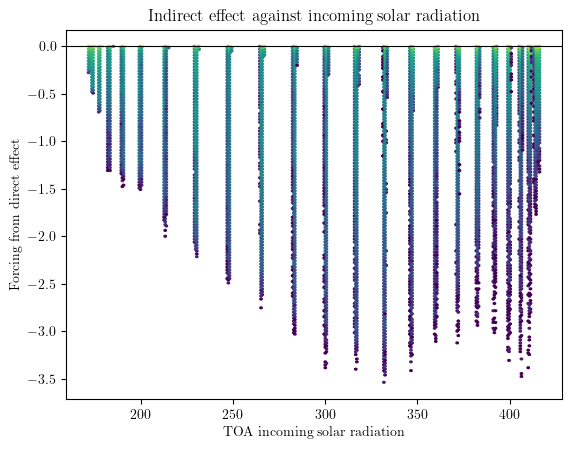

In [187]:
def plot():
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_yearmean.nc')
    prp = xr.open_dataset('../datasets/historical-CR_single-plumes_PRP_yearmean.nc')

    #time = year - 1850
    #albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    irradiance = srad.srad0d
    forcing = (prp.dR_spi_srad0 + prp.dR_spi_trad0)
    #forcing = forcing.where((forcing > 0.05) | (forcing < - 0.05))

    #plt.scatter(irradiance, forcing, s=1, color='black', marker='x', linewidths=0.5)
    plt.hexbin(irradiance, forcing, gridsize=200, bins='log')
    plt.axhline(0, color='black', linewidth=0.8)
    #plt.axvline(0.5, color='black', linewidth=0.8)

    plt.xlabel('TOA incoming solar radiation')
    plt.ylabel('Forcing from direct effect')

    plt.title('Indirect effect against incoming solar radiation')

plot()

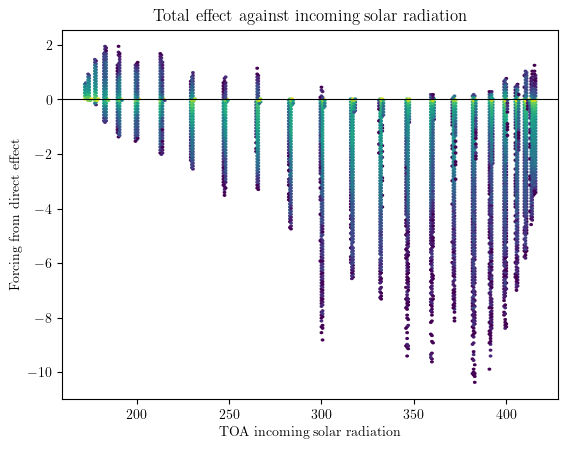

In [9]:
def plot():
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_yearmean.nc')
    prp = xr.open_dataset('../datasets/historical-CR_single-plumes_PRP_yearmean.nc')

    #srad = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_monmean_1950-2013.nc')
    #prp = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_PRP_monmean_1950-2013.nc')

    #time = year - 1850
    #albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    irradiance = srad.srad0d
    forcing = (prp.dR_sp_srad0 + prp.dR_sp_trad0)
    #forcing = forcing.where((forcing > 0.05) | (forcing < - 0.05))

    #plt.scatter(irradiance, forcing, s=1, color='black', marker='x', linewidths=0.5)
    plt.hexbin(irradiance, forcing, gridsize=200, bins='log')
    plt.axhline(0, color='black', linewidth=0.8)
    #plt.axvline(0.5, color='black', linewidth=0.8)

    plt.xlabel('TOA incoming solar radiation')
    plt.ylabel('Forcing from direct effect')

    plt.title('Total effect against incoming solar radiation')

plot()

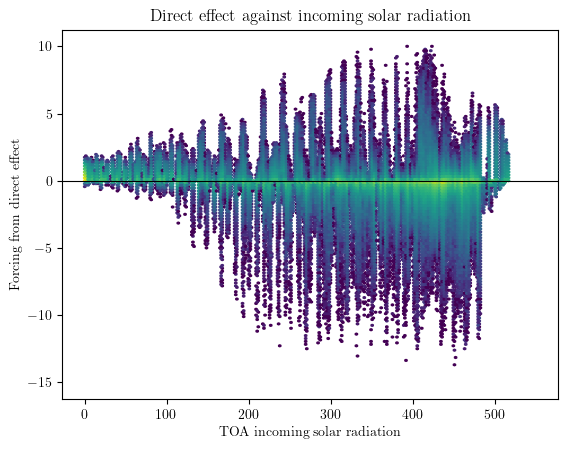

In [4]:
def plot():
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_monmean_1950-2013.nc')
    prp = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_PRP_monmean_1950-2013.nc')
    #time = year - 1850
    #albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    irradiance = srad.srad0d
    forcing = (prp.dR_spd_srad0)# + prp.dR_spd_trad0)
    forcing = forcing.where((forcing > 0.01) | (forcing < - 0.01))

    #plt.scatter(irradiance, forcing, s=1, color='black', marker='x', linewidths=0.5)
    plt.hexbin(irradiance, forcing, gridsize=200, bins='log',extent=[0,550,-15,10])
    plt.axhline(0, color='black', linewidth=0.8)
    #plt.axvline(0.5, color='black', linewidth=0.8)

    plt.xlabel('TOA incoming solar radiation')
    plt.ylabel('Forcing from direct effect')

    plt.title('Direct effect against incoming solar radiation')

plot()

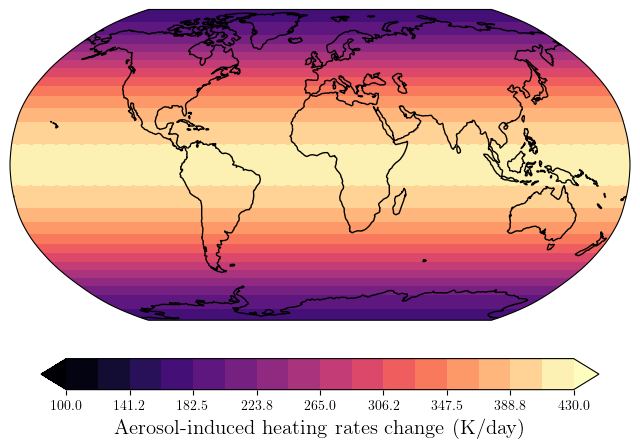

In [12]:
def plot(year):
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_yearmean.nc')
    time = year - 1850
    albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))


    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )

    var = srad.srad0d.isel(time=160)

    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='magma',
        levels= np.linspace(100, 430, 17), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Aerosol-induced heating rates change (K/day)', size=15, weight='bold')

    ax.coastlines()


plot(1980)

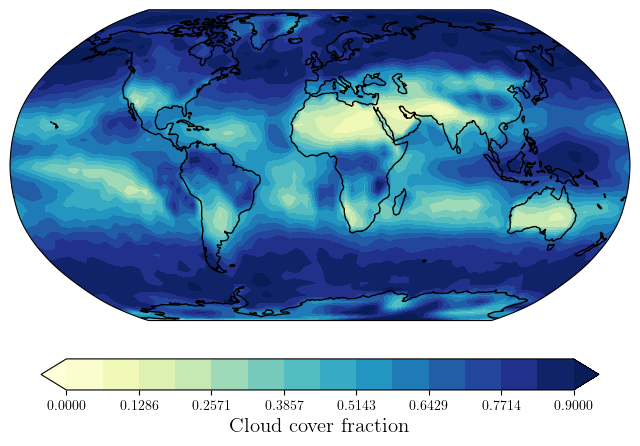

In [185]:
def plot(year):

    cloud = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_aclcov_yearmean.nc')

    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )

    time = year - 1950
    var = cloud.aclcov.isel(time=time)
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='YlGnBu',
        #cmap='PuBu',
        levels= np.linspace(0, 0.9, 15), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )

    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Cloud cover fraction', size=15, weight='bold')

    ax.coastlines()

    plt.savefig(f'../figures/clouds.pdf', dpi=400)


plot(1980)

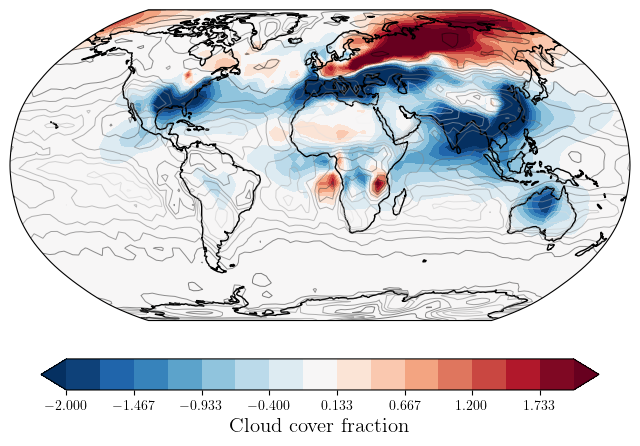

In [177]:
def plot(year):

    cloud = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_aclcov_yearmean.nc')
    prp = xr.open_dataset('../datasets/historical-CR_single-plumes_PRP_yearmean.nc')

    time = year - 1850
    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )

    var = prp.dR_spd_srad0.isel(time=time)
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx) 

    pc2 = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='RdBu_r',
        #cmap='PuBu',
        levels= np.linspace(-2, 2, 16), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )

    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc2, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Cloud cover fraction', size=15, weight='bold')

    time = year - 1950
    var = cloud.aclcov.isel(time=time)
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contour(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='Greys',
        #cmap='PuBu',
        levels= np.linspace(0, 0.9, 10), #np.linspace(Nmin, Nmax, 17),
        linewidths=0.7,
        extend="both",
        alpha=0.5,
    )

    #axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    #cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    #cb.set_label(label='Cloud cover fraction', size=15, weight='bold')

    ax.coastlines()

    plt.savefig(f'../figures/direct-effect_clouds.pdf', dpi=400)


plot(1980)

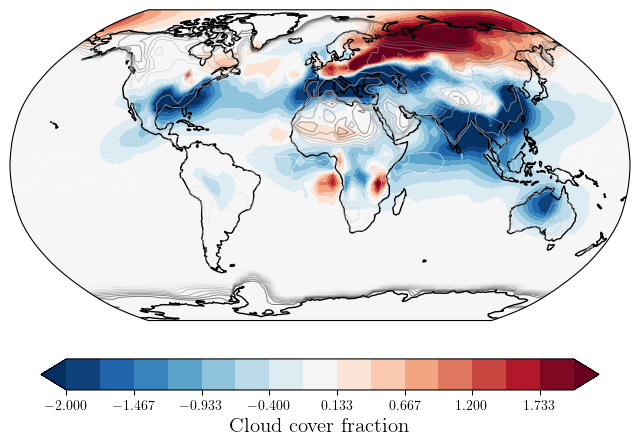

In [180]:
def plot(year):

    cloud = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_aclcov_yearmean.nc')
    prp = xr.open_dataset('../datasets/historical-CR_single-plumes_PRP_yearmean.nc')

    time = year - 1850
    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )

    var = prp.dR_spd_srad0.isel(time=time)
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx) 

    pc2 = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='RdBu_r',
        #cmap='PuBu',
        levels= np.linspace(-2, 2, 16), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )

    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc2, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Cloud cover fraction', size=15, weight='bold')

    time = year - 1950
    var = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contour(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='Greys',
        #cmap='PuBu',
        levels= np.linspace(0.05, 0.5, 10), #np.linspace(Nmin, Nmax, 17),
        linewidths=0.7,
        extend="both",
        alpha=0.5,
    )

    #axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    #cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    #cb.set_label(label='Cloud cover fraction', size=15, weight='bold')

    ax.coastlines()

    plt.savefig(f'../figures/direct-effect_albedo.pdf', dpi=400)


plot(1980)

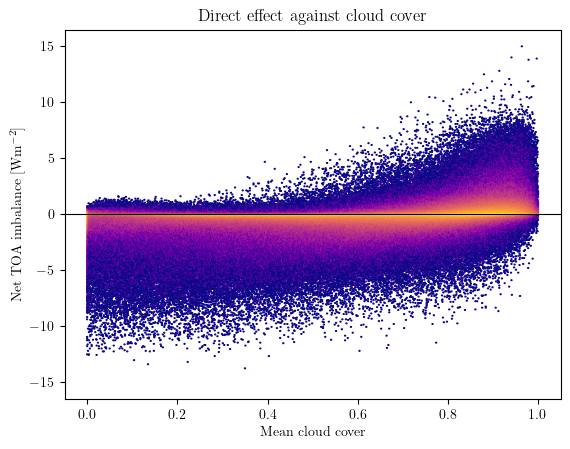

In [3]:
def plot():
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_monmean_1950-2013.nc')
    prp = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_PRP_monmean_1950-2013.nc')

    #cloud = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_yearmean.nc')
    #prp = xr.open_dataset('../datasets/historical-CR_single-plumes_PRP_yearmean.nc')

    #time = year - 1850
    #albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    #cloud = cloud.aclcov
    cloud = srad.aclcov
    forcing = (prp.dR_spd_srad0 + prp.dR_spd_trad0)
    forcing = forcing.where((forcing > 0.01) | (forcing < - 0.01))

    fig, ax = plt.subplots()
    #ax.hexbin(albedo, forcing, bins=10, extent=[0.05, 0.8, -14, 14])

    #xy = np.vstack([cloud,forcing])
    #z = gaussian_kde(xy)(xy)
    
    #plt.scatter(cloud, forcing, s=1, color='black', marker='x', linewidths=1)
    plt.hexbin(cloud, forcing, bins='log', extent=[0,1,-15,15], cmap='plasma', gridsize=500)
    plt.axhline(0, color='black', linewidth=0.8)
    #plt.axvline(0.5, color='black', linewidth=0.8)
    #plt.xlim([0.1,0.75])

    plt.xlabel('Mean cloud cover')
    plt.ylabel(r'Net TOA imbalance [Wm$^{-2}$]')

    plt.title('Direct effect against cloud cover')

plot()

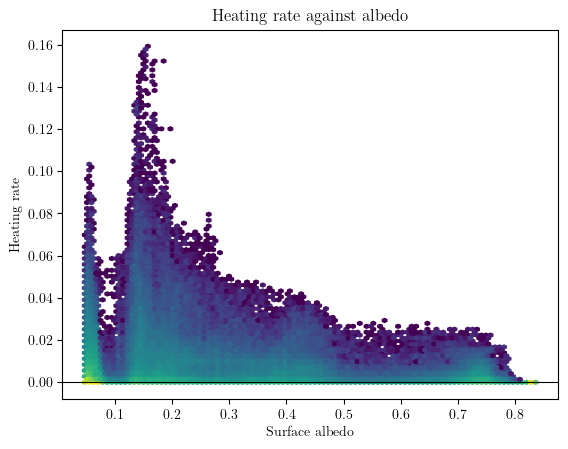

In [11]:
def plot():
    dataPath = "/home/anthe/documents/misu/paper_aerosols/absorption/datasets/"
    data_vertmean = xr.open_dataset(f'{dataPath}/historical-CR_single-plumes_3D_PRP_yearmean_vertmean.nc').squeeze()
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_3D_BOT_yearmean.nc')
    
    albedo = (- srad.sradsu /(srad.srads - srad.sradsu)) #surface
    #albedo = -srad.srad0u/(srad.srad0d)  #planetary
    albedo = albedo.where(albedo>0)
    #albedo = albedo.where((albedo > 0) & (albedo < 1))

    absorption = data_vertmean.dQ_spd_srad + data_vertmean.dQ_spd_trad
    fig, ax = plt.subplots()

    #plt.scatter(cloud, forcing, s=1, color='black', marker='x', linewidths=1)
    plt.hexbin(albedo, absorption, bins='log',)
    plt.axhline(0, color='black', linewidth=0.8)
    #plt.axvline(0.5, color='black', linewidth=0.8)
    #plt.xlim([0.1,0.75])

    plt.xlabel('Surface albedo')
    plt.ylabel(r'Heating rate')

    plt.title('Heating rate against albedo')

plot()

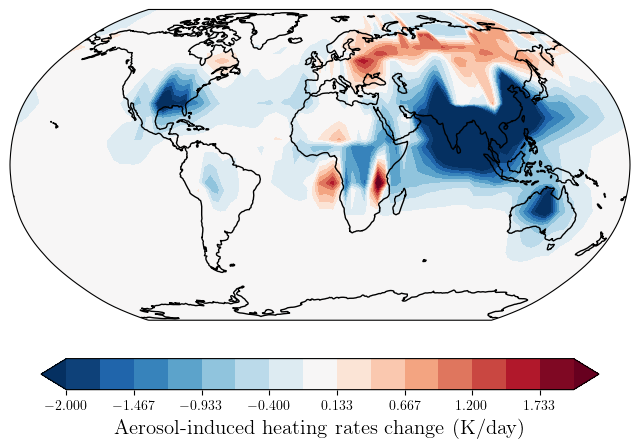

In [4]:
def plot(year):

    time = year - 1850
    albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))


    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )

    var = (prp.dR_spd_srad0.isel(time=time) + prp.dR_spd_trad0.isel(time=time))
    reflection = (-((albedo.where(albedo>0.4)) + 1)).fillna(0)
    absorption = (-(albedo.where(albedo<0.4) + 1) + 2).fillna(0)

    var = var/(reflection + absorption)
    
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='RdBu_r',
        levels= np.linspace(-2, 2, 16), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Aerosol-induced heating rates change (K/day)', size=15, weight='bold')

    ax.coastlines()


plot(2005)

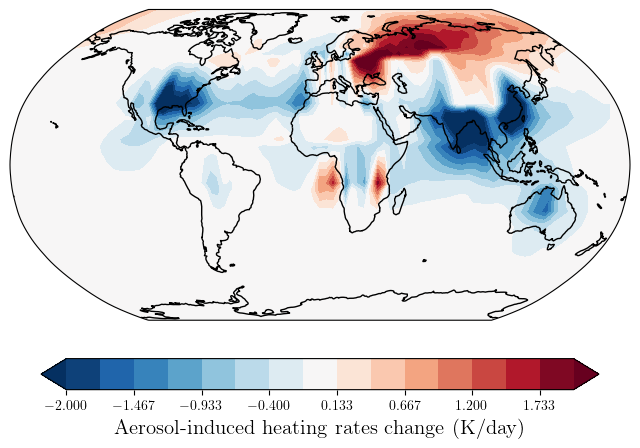

In [74]:
def plot(year):

    time = year - 1850
    albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))


    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )

    var = (prp.dR_spd_srad0.isel(time=time) + prp.dR_spd_trad0.isel(time=time))/(albedo+1)

    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='RdBu_r',
        levels= np.linspace(-2, 2, 16), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Aerosol-induced heating rates change (K/day)', size=15, weight='bold')

    ax.coastlines()


plot(1980)